In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from matplotlib import cm
import glob
import os
import pandas as pd

def moving_average(x, w):
    return np.concatenate((x[:5],np.convolve(x[5:], np.ones(w), 'valid') / w))

def plot(ax, mean, std, label, color):
    if len(mean) == 0: return 
    ax.plot(np.arange(len(mean)), mean, label=label, c=color)
    ax.fill_between(np.arange(len(mean)), mean-std, mean+std, facecolor=color, alpha=0.2)

In [ ]:
def get_data_omni(setting, moving_step=5):
    temp = list()
    path = "./results/omniglot/basic"
    for foldername in os.listdir(path):
        if setting not in foldername: continue
        filename = "test_s2970.csv"
        try:
            data = pd.read_csv(os.path.join(path, foldername, filename)).values[:,1]
            temp.append(data)
        except:
            pass
    return moving_average(np.mean(temp, axis=0), moving_step),  moving_average(np.std(temp, axis=0), moving_step)

# Testing stage zeroing

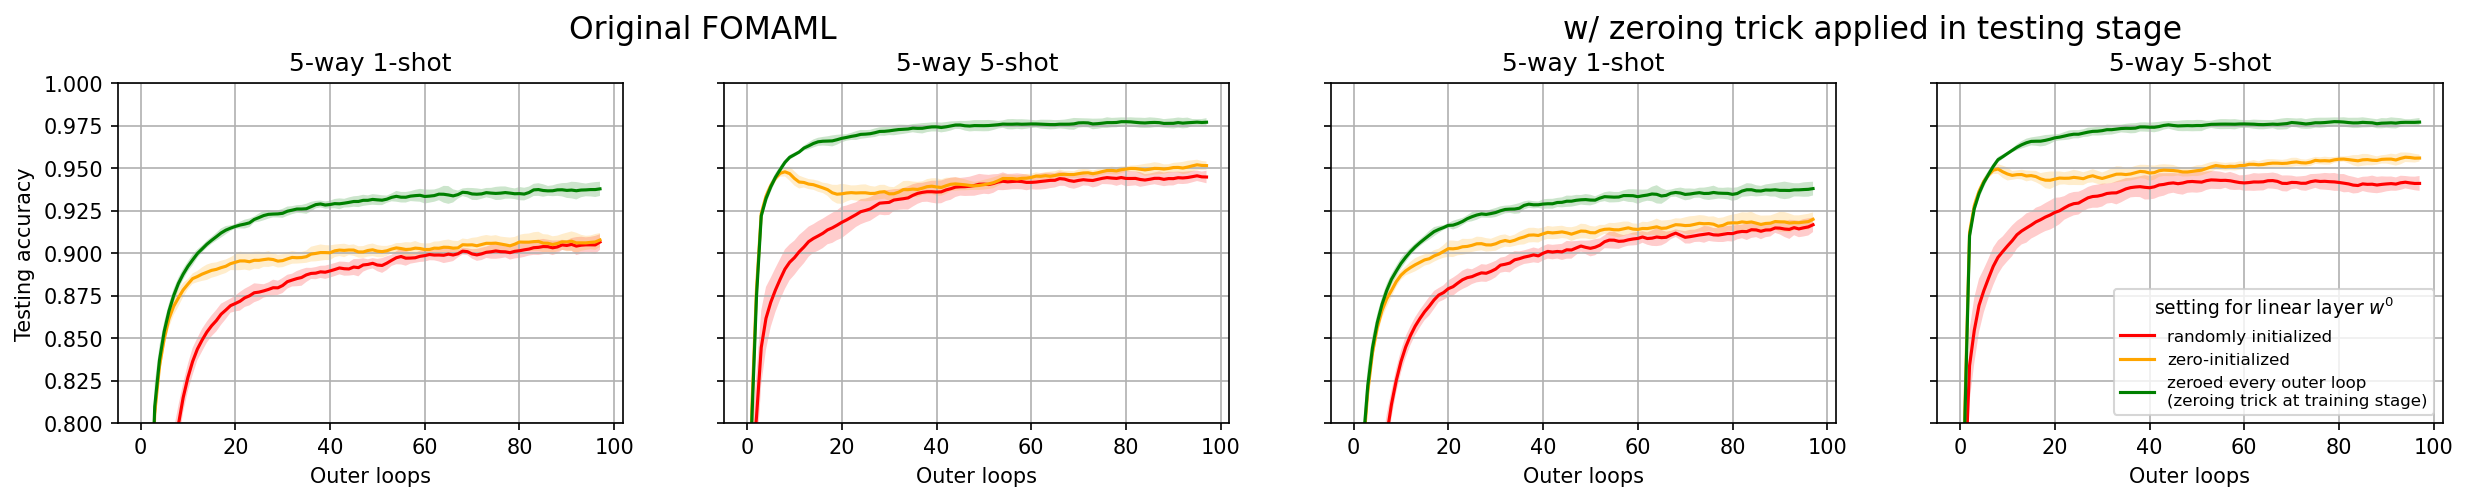

In [2]:
labels = [
    "randomly initialized", 
    "zero-initialized", 
    "zeroed every outer loop \n(zeroing trick at training stage)",
]

fig, axes = plt.subplots(1, 4, figsize=(20,3), sharey=True, dpi=150)

mean, std = get_data_omni("5w1s_FO_zero0_initvar1.0")
plot(axes[0], mean[0::2], std[0::2],label=labels[0], color="red")
mean, std = get_data_omni("5w1s_FO_zero0_initvar0.0")
plot(axes[0], mean[0::2], std[0::2],label=labels[1], color="orange")
mean, std = get_data_omni("5w1s_FO_zero1_initvar1.0")
plot(axes[0], mean[0::2], std[0::2],label=labels[2], color="green")

mean, std = get_data_omni("5w5s_FO_zero0_initvar1.0")
plot(axes[1], mean[0::2], std[0::2],label=labels[0], color="red")
mean, std = get_data_omni("5w5s_FO_zero0_initvar0.0")
plot(axes[1], mean[0::2], std[0::2],label=labels[1], color="orange")
mean, std = get_data_omni("5w5s_FO_zero1_initvar1.0")
plot(axes[1], mean[0::2], std[0::2],label=labels[2], color="green")

mean, std = get_data_omni("5w1s_FO_zero0_initvar1.0")
plot(axes[2], mean[1::2], std[1::2],label=labels[0], color="red")
mean, std = get_data_omni("5w1s_FO_zero0_initvar0.0")
plot(axes[2], mean[1::2], std[1::2],label=labels[1], color="orange")
mean, std = get_data_omni("5w1s_FO_zero1_initvar1.0")
plot(axes[2], mean[1::2], std[1::2],label=labels[2], color="green")

mean, std = get_data_omni("5w5s_FO_zero0_initvar1.0")
plot(axes[3], mean[1::2], std[1::2],label=labels[0], color="red")
mean, std = get_data_omni("5w5s_FO_zero0_initvar0.0")
plot(axes[3], mean[1::2], std[1::2],label=labels[1], color="orange")
mean, std = get_data_omni("5w5s_FO_zero1_initvar1.0")
plot(axes[3], mean[1::2], std[1::2],label=labels[2], color="green")


for ax in axes.flatten():
    ax.grid()
    ax.set_xlabel("Outer loops")
    ax.tick_params(axis='both', which='major')
    ax.set_ylim([0.8, 1.])
    
plt.text(0.32, 0.98, 'Original FOMAML', transform=fig.transFigure, horizontalalignment='center', fontsize=15)
axes[0].set_title("5-way 1-shot")
axes[1].set_title("5-way 5-shot")
plt.text(0.71, 0.98, 'w/ zeroing trick applied in testing stage', transform=fig.transFigure, horizontalalignment='center', fontsize=15)
axes[2].set_title("5-way 1-shot")
axes[3].set_title("5-way 5-shot")

# axes[0].set_title("Original FOMAML")
# axes[1].set_title("w/ zeroing trick applied in testing stage")
axes[0].set_ylabel("Testing accuracy")
axes[3].legend(loc=4, title=r"setting for linear layer $w^0$", title_fontsize=9, fontsize=8)

plt.savefig("./images/omni_test_zero_20220303.pdf", bbox_inches='tight')

# Initialization scaling

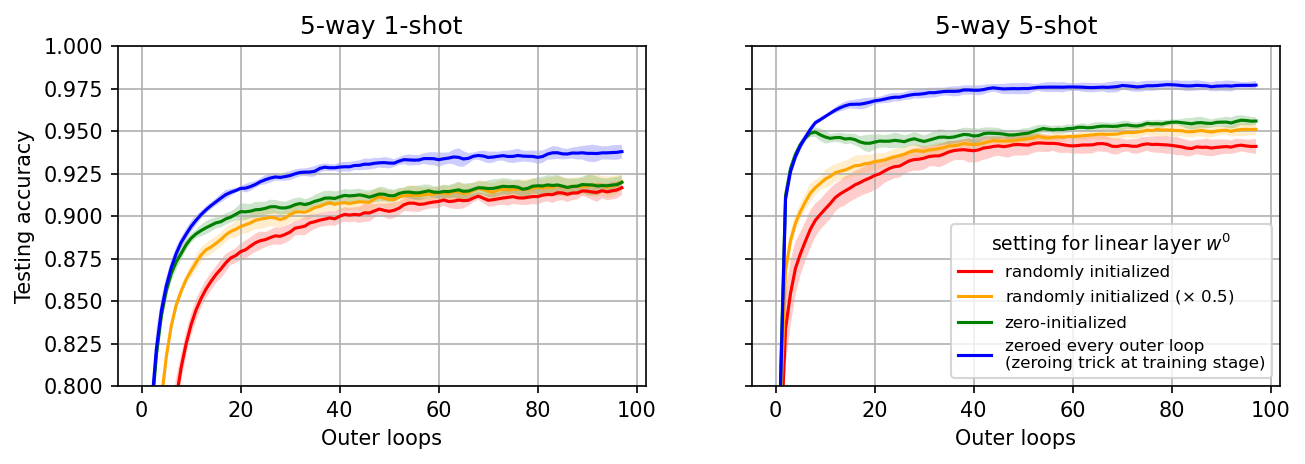

In [3]:
labels = [
    "randomly initialized", 
    r"randomly initialized ($\times$ 0.5)", 
    "zero-initialized", 
    "zeroed every outer loop \n(zeroing trick at training stage)",
]

fig, axes = plt.subplots(1, 2, figsize=(10,3), sharey=True, dpi=150)

mean, std = get_data_omni("5w1s_FO_zero0_initvar1.0")
plot(axes[0], mean[1::2], std[1::2],label=labels[0], color="red")
mean, std = get_data_omni("5w1s_FO_zero0_initvar0.5")
plot(axes[0], mean[1::2], std[1::2],label=labels[1], color="orange")
mean, std = get_data_omni("5w1s_FO_zero0_initvar0.0")
plot(axes[0], mean[1::2], std[1::2],label=labels[2], color="green")
mean, std = get_data_omni("5w1s_FO_zero1_initvar1.0")
plot(axes[0], mean[1::2], std[1::2],label=labels[3], color="blue")

mean, std = get_data_omni("5w5s_FO_zero0_initvar1.0")
plot(axes[1], mean[1::2], std[1::2],label=labels[0], color="red")
mean, std = get_data_omni("5w5s_FO_zero0_initvar0.5")
plot(axes[1], mean[1::2], std[1::2],label=labels[1], color="orange")
mean, std = get_data_omni("5w5s_FO_zero0_initvar0.0")
plot(axes[1], mean[1::2], std[1::2],label=labels[2], color="green")
mean, std = get_data_omni("5w5s_FO_zero1_initvar1.0")
plot(axes[1], mean[1::2], std[1::2],label=labels[3], color="blue")


for ax in axes.flatten():
    ax.grid()
    ax.set_xlabel("Outer loops")
    ax.tick_params(axis='both', which='major')
    ax.set_ylim([0.8, 1.])
    
axes[0].set_title("5-way 1-shot")
axes[1].set_title("5-way 5-shot")
axes[0].set_ylabel("Testing accuracy")
axes[1].legend(loc=4, title=r"setting for linear layer $w^0$", title_fontsize=9, fontsize=8)

plt.savefig("./images/omni_init_20220303.pdf", bbox_inches='tight')

# First order and second order (5-way 5-shot only)

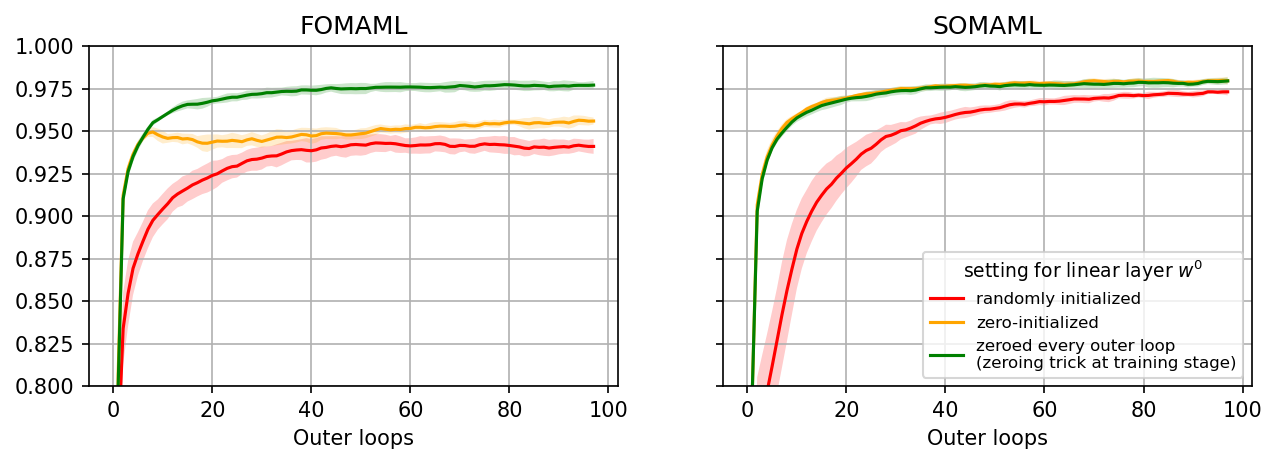

In [4]:
labels = [
    "randomly initialized", 
#     r"randomly initialized ($\times$ 0.7)", 
    "zero-initialized", 
    "zeroed every outer loop \n(zeroing trick at training stage)",
]

fig, axes = plt.subplots(1, 2, figsize=(10,3), sharey=True, dpi=150)

mean, std = get_data_omni("5w5s_FO_zero0_initvar1.0")
plot(axes[0], mean[1::2], std[1::2],label=labels[0], color="red")
mean, std = get_data_omni("5w5s_FO_zero0_initvar0.0")
plot(axes[0], mean[1::2], std[1::2],label=labels[1], color="orange")
mean, std = get_data_omni("5w5s_FO_zero1_initvar1.0")
plot(axes[0], mean[1::2], std[1::2],label=labels[2], color="green")

mean, std = get_data_omni("5w5s_SO_zero0_initvar1.0")
plot(axes[1], mean[1::2], std[1::2],label=labels[0], color="red")
mean, std = get_data_omni("5w5s_SO_zero0_initvar0.0")
plot(axes[1], mean[1::2], std[1::2],label=labels[1], color="orange")
mean, std = get_data_omni("5w5s_SO_zero1_initvar1.0")
plot(axes[1], mean[1::2], std[1::2],label=labels[2], color="green")


# plt.text(0.5, 0.98, '5-way 5-shot setting', transform=fig.transFigure, horizontalalignment='center', fontsize=15)
axes[0].set_title("FOMAML")
axes[1].set_title("SOMAML")

for i, ax in enumerate(axes.flatten()):
    
    ax.tick_params(axis='both', which='major')
    ax.set_xlabel("Outer loops")
    ax.grid() 
    ax.set_ylim([0.8,1])

axes[1].legend(loc=4, title=r"setting for linear layer $w^0$", title_fontsize=9, fontsize=8)

plt.savefig("./images/omni_fomaml_somaml_20220303.pdf", bbox_inches='tight')

# Memorization

In [5]:
def get_data_omni_memo(setting, moving_step=5):
    temp = list()
    path = "./results/omniglot/memorization"
    for foldername in os.listdir(path):
        if setting not in foldername: continue
        filename = "test_s2970.csv"
        try:
            data = pd.read_csv(os.path.join(path, foldername, filename)).values[:,1]
            temp.append(data)
        except:
            pass
    return moving_average(np.mean(temp, axis=0), moving_step),  moving_average(np.std(temp, axis=0), moving_step)

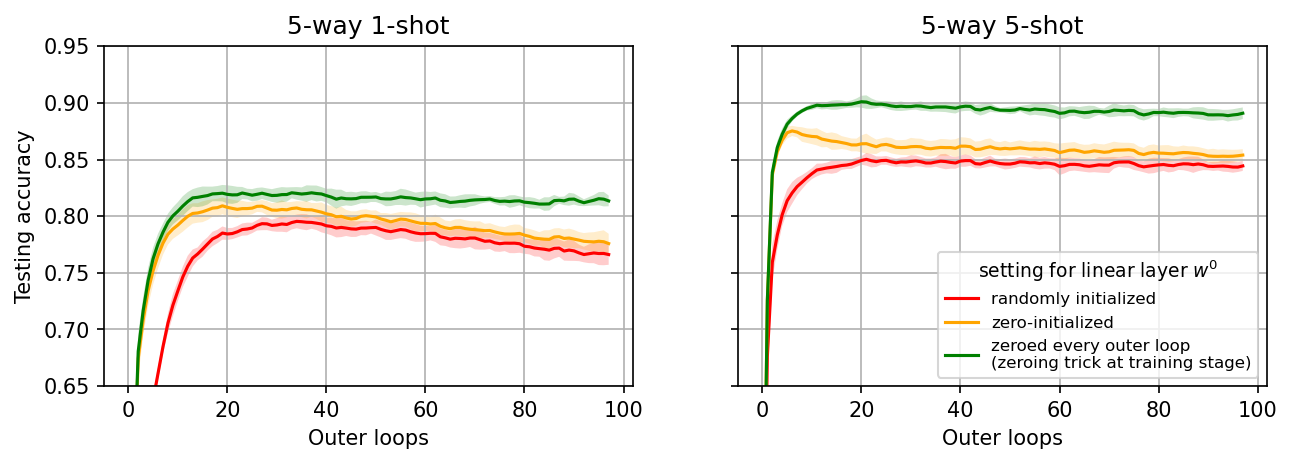

In [6]:
labels = [
    "randomly initialized", 
    "zero-initialized", 
    "zeroed every outer loop \n(zeroing trick at training stage)",
]

fig, axes = plt.subplots(1, 2, figsize=(10,3), sharey=True, dpi=150)

mean, std = get_data_omni_memo("5w1s_FO_zero0_initvar1.0")
plot(axes[0], mean[1::2], std[1::2],label=labels[0], color="red")
mean, std = get_data_omni_memo("5w1s_FO_zero0_initvar0.0")
plot(axes[0], mean[1::2], std[1::2],label=labels[1], color="orange")
mean, std = get_data_omni_memo("5w1s_FO_zero1_initvar0.0")
plot(axes[0], mean[1::2], std[1::2],label=labels[2], color="green")

mean, std = get_data_omni_memo("5w5s_FO_zero0_initvar1.0")
plot(axes[1], mean[1::2], std[1::2],label=labels[0], color="red")
mean, std = get_data_omni_memo("5w5s_FO_zero0_initvar0.0")
plot(axes[1], mean[1::2], std[1::2],label=labels[1], color="orange")
mean, std = get_data_omni_memo("5w5s_FO_zero1_initvar0.0")
plot(axes[1], mean[1::2], std[1::2],label=labels[2], color="green")

for ax in axes.flatten():
    ax.grid()
    ax.set_xlabel("Outer loops")
    ax.tick_params(axis='both', which='major')

ax.set_ylim([0.65, .95])    
axes[0].set_title("5-way 1-shot")
axes[1].set_title("5-way 5-shot")

axes[0].set_ylabel("Testing accuracy")
axes[1].legend(loc=4, title=r"setting for linear layer $w^0$", title_fontsize=9, fontsize=8)

plt.savefig("./images/omni_memorization_20220303.pdf", bbox_inches='tight')